In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [2]:
data = pd.read_excel('Zenith angle vs. coincident count rate.xlsx')

In [3]:
data

,Zenith angle,Avg. count per hour
0,0,11.4
1,9,11.5
2,19,10.1
3,28,8.8
4,34,8.3
5,40,7.7
6,45,5.8
7,53,5.6
8,66,3.1
9,70,3.0


In [4]:
X = data.iloc[:,0].values
y = data.iloc[:,1].values

In [5]:
from scipy import optimize

### func1 = aCos(x)^n+b

In [6]:
def func1(x, a, n, b):
    return a*np.cos(np.deg2rad(X))**n + b

In [7]:
popt_func1, pcov_func1 = optimize.curve_fit(func1, X, y, p0=[1, 0, 0])

In [8]:
param = ['a','n','b']

In [9]:
for i in range(3):
    print ('Value for',param[i],' = ',popt_func1[i])

Value for a  =  9.338158293628565
Value for n  =  2.196544842507936
Value for b  =  2.060499473893638


In [10]:
perr = np.sqrt(np.diag(pcov_func1))
for i in range(3):
    print ('standard deviation error for',param[i],' = ',perr[i])

standard deviation error for a  =  0.33827630183132446
standard deviation error for n  =  0.21471318840975576
standard deviation error for b  =  0.2858942016107567


### Fitted curve to func 1

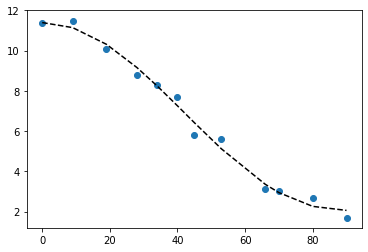

In [11]:
plt.scatter(X,y)
plt.plot(X,func1(X,*popt_func1),'k--')

In [12]:
def func2(x, a, b, n, k):
    return a*np.cos(np.deg2rad(X+k))**n + b

In [13]:
popt_func2, pcov_func2 = optimize.curve_fit(func2, X, y, p0=[1, 0, 0, -5])

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


In [14]:
print('Value for k = ',popt_func2[-1])


Value for k =  -2.275585885558386e-06


In [109]:
from sklearn.metrics import r2_score
print('R^2 score :',r2_score(y,func1(X,*popt_func1)))

R^2 score : 0.9887736063413974


### Ratio of pathlengths (S/d)

In [16]:
Y_new = y/0.14

In [17]:
def D(theta,k):
    """ theta -> in degrees
        k = R/d 
    """
    return np.sqrt((k*np.cos(np.deg2rad(theta)))**2 + 2*k + 1) - k*np.cos(np.deg2rad(theta))

R^2 score : 0.9558689488160564


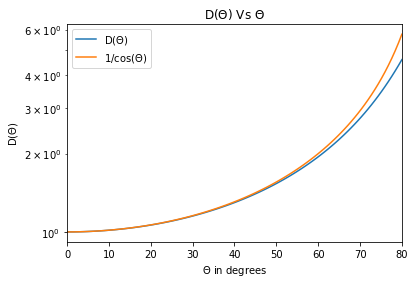

In [137]:
x = np.linspace(0,80,100)
F = D(x,50)
plt.plot(x,F, label=r'D($\Theta$)')
plt.yscale('log')
plt.xlabel(r'$\Theta$ in degrees')
plt.ylabel(r'D($\Theta$)')
plt.title(r'D($\Theta$) Vs $\Theta$')
f = 1/np.cos(np.deg2rad(x))
plt.plot(x,f, label=r'1/cos($\Theta$)')
plt.xlim([0,80])
plt.legend()

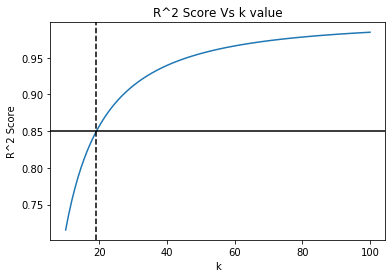

In [133]:
K = np.linspace(10,100,100)
R2_score = np.zeros(shape=K.shape)
for i,k in enumerate(K):
    F = D(x,k)
    f = 1/np.cos(np.deg2rad(x))
    R2_score[i] = r2_score(f,F)
plt.plot(K,R2_score)
plt.title('R^2 Score Vs k value')
plt.ylabel('R^2 Score')
plt.xlabel('k')
plt.axhline(y=0.85, ls='-', c='black')
min_R2 = np.where(R2_score>=0.85)[0][0] # Get minimum value for k s.t. R^2 score >=0.85
plt.axvline(x=K[min_R2], ls='--', c='black')

In [129]:
min_R2 = np.where(R2_score>=0.85)[0][0]
K[min_R2]

19.09090909090909

In [18]:
n_0 = 3       #initial n value
R = 6371    #Earth's Radius

In [19]:
I0 = np.ones(shape=(2))
k = np.ones(shape=(2))
n = np.array([n_0 , 0.])
param = {"I0":I0, "k":k, "n":n}
i = 1

In [20]:
def flux_k(theta,I0,k):
    n = param["n"][0]
    return I0*D(theta,k)**-(n-1)

In [21]:
def flux_n(theta,I0,n):
    k = param["k"][0]
    return I0*D(theta,k)**-(n-1)

In [22]:
if i==1:
    popt_flux, pcov_flux = optimize.curve_fit(flux_k,X,Y_new,p0=[10,4])
    #Updating parameters
    param["I0"] = [popt_flux[0], perr[0]]
    param["k"] = [popt_flux[1], perr[1]]
else:
    popt_flux, pcov_flux = optimize.curve_fit(flux_n,X,Y_new,p0=[10,4])
    #Updating parameters
    param["I0"] = [popt_flux[0], perr[0]]
    param["n"] = [popt_flux[1], perr[1]]

perr = np.sqrt(np.diag(pcov_flux))         #Getting std error 
i ^= 1

print(param)

{'I0': [79.64910902573874, 0.33827630183132446], 'k': [3.795422387790475, 0.21471318840975576], 'n': array([3., 0.])}


In [48]:
type(y)

numpy.ndarray